# Clustering 

Code taken from [ISLR Python](https://nbviewer.jupyter.org/github/JWarmenhoven/ISL-python/blob/master/Notebooks/Chapter%2010.ipynb).

Slides for this lecture can be found [here](https://docs.google.com/presentation/d/1_FSF6woO6MOTRwDZmH_o4sG3lbl8nagRfhC_R6Q_Dc0/edit?usp=sharing)

In [21]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

### Generating Data 

In [2]:
# Generate data
np.random.seed(2)
X = np.random.standard_normal((50,2))
X[:25,0] += 3
X[:25,1] += -4

X[:5]

array([[ 2.58324215, -4.05626683],
       [ 0.8638039 , -2.35972919],
       [ 1.20656441, -4.84174737],
       [ 3.50288142, -5.24528809],
       [ 1.94204778, -4.90900761]])

Text(0.5, 1.0, 'Some Random Data')

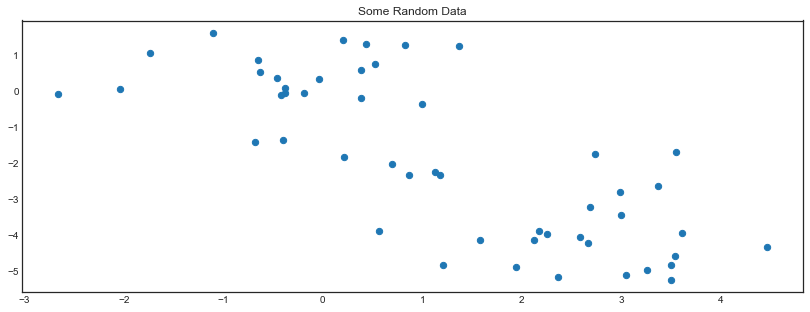

In [3]:
fig, (ax1) = plt.subplots(1, figsize=(14,5))
ax1.scatter(X[:,0], X[:,1], s=40, cmap=plt.cm.prism) 
plt.title("Some Random Data")

# K Means

## Make 2 Clusters

In [4]:
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
km1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int32)

## Make 3 Clusters

In [6]:
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
km2.labels_

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2], dtype=int32)

In [8]:
pd.Series(km2.labels_).value_counts()

1    21
0    20
2     9
dtype: int64

In [9]:
km2.cluster_centers_

array([[-0.27876523,  0.51224152],
       [ 2.82805911, -4.11351797],
       [ 0.69945422, -2.14934345]])

In [10]:
# Sum of distances of samples to their closest cluster center.
km2.inertia_

68.97379200939726

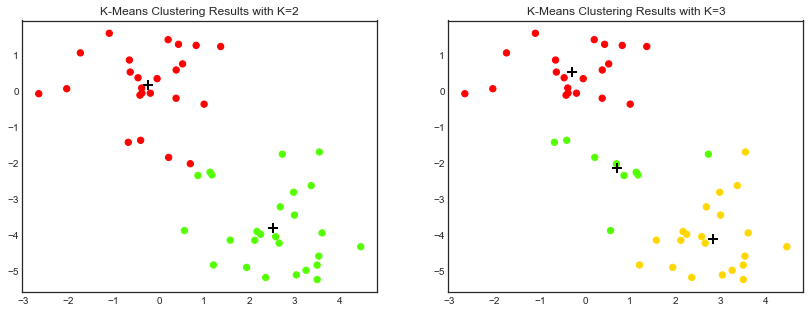

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X[:,0], X[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

# Hierarchical Clustering

Code taken from [Stack Abuse](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/).

In [12]:
Y = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

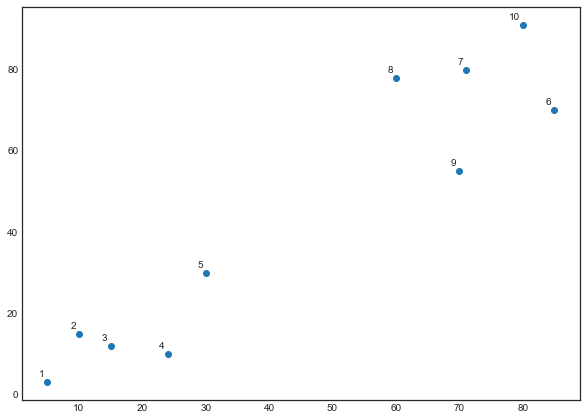

In [13]:
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(Y[:,0],Y[:,1], label='True Position')

for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    plt.annotate(label,xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

### Scipy

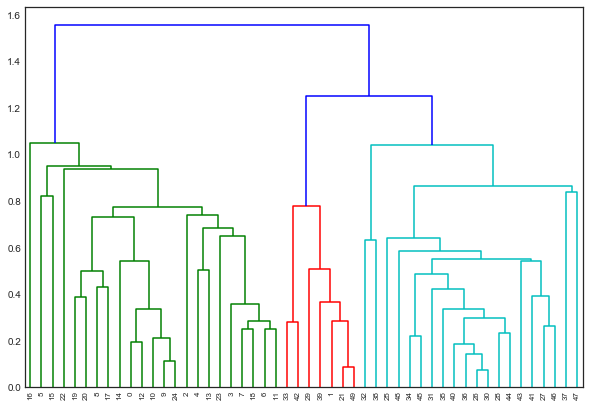

In [14]:
# Step 1: Select the type of linkage and generate the hierarchical clusters
linked = shc.linkage(X, 'single')

plt.figure(figsize=(10, 7))
# Step 2: Plot the hierarchical clustering as a dendrogram
shc.dendrogram(linked)
plt.show()

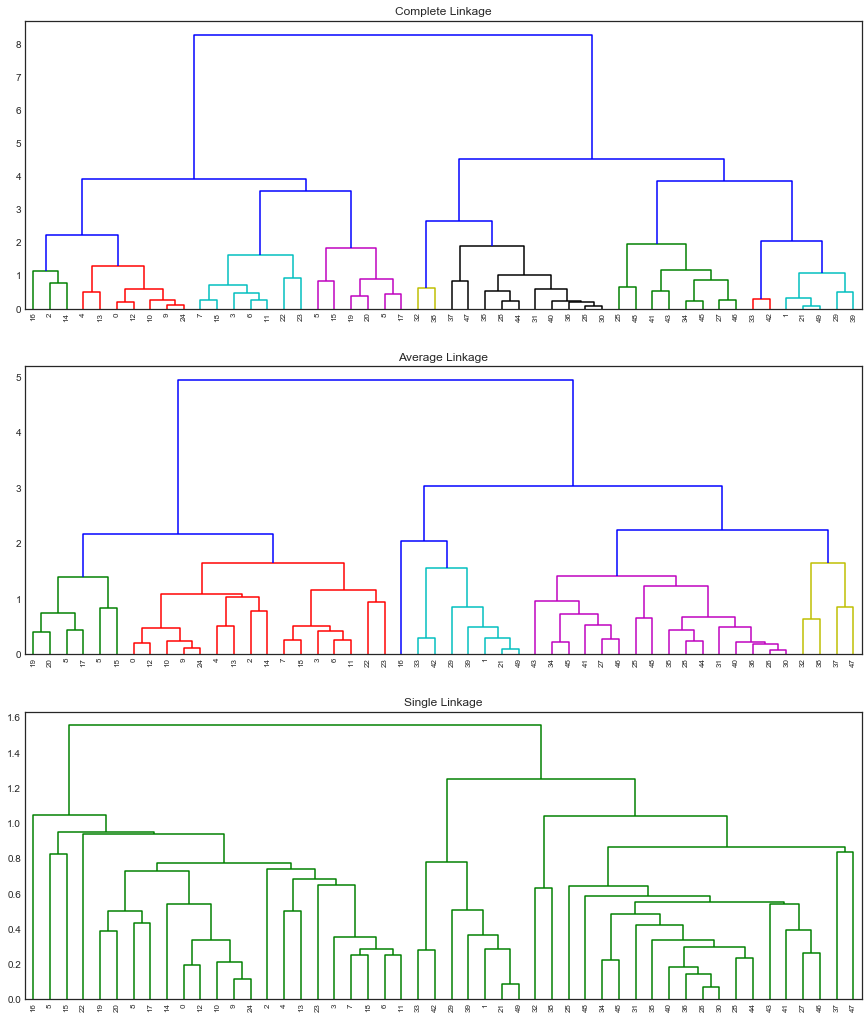

In [22]:
# We repeat the process 3 times to try multiple types of linkage
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,18))

# This time we define linkage through functions instead of an argument
for linkage, cluster, ax in zip([shc.complete(X),
                                 shc.average(X),
                                 shc.single(X)],
                                ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    shc.dendrogram(linkage, ax=ax, color_threshold=2)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

# Clustering Segmentation


Material taken from [Stackabuse](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/).


In [16]:
customer_data = pd.read_csv('shopping-data.csv')

In [17]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
data = customer_data.iloc[:, 3:5].values

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [125.0, 125.0, 143.75, 143.75],
  [115.0, 115.0, 134.375, 134.375],
  [92.5, 92.5, 124.6875, 124.6875],
  [70.0, 70.0, 108.59375, 108.59375],
  [42.5, 42.5, 89.296875, 89.296875],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [180.0, 180.0, 200.0, 200.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [222.5, 222.5, 252.5, 252.5],
  [190.0, 190.0, 237.5, 237.5],
  [275.0, 275.0, 285.0, 285.0],
  [295.0, 295.0, 305.0, 305.0],
  [280.0, 280.0, 300.0, 300.0],
  [213.75, 213.75, 290.0, 290.0],
  [65.8984375, 65.8984375, 251.875, 251.875],
  [315.0, 315.0, 325.0, 325.0],
  [375.0, 375.0, 3

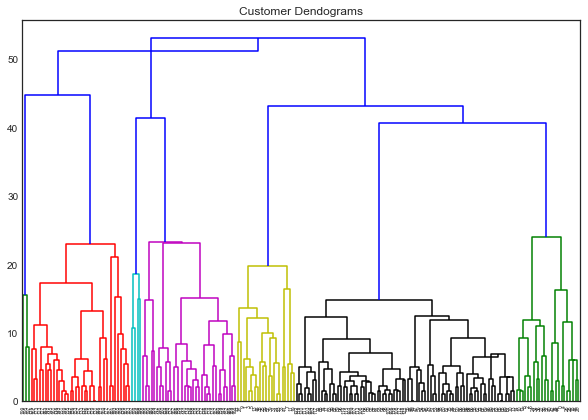

In [19]:
# This time we embed our clustering engine inside of the plot generator (a one liner!)
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
shc.dendrogram(shc.linkage(data, method='centroid'))

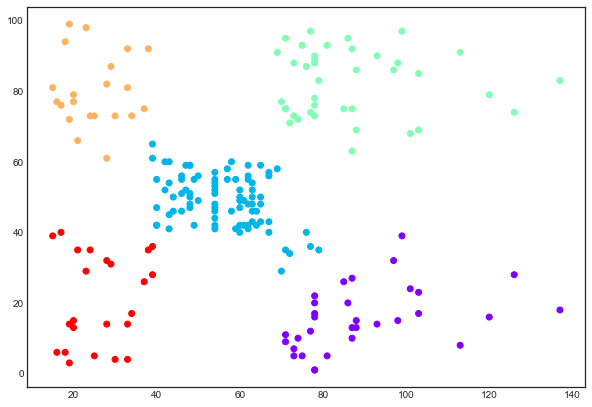

In [20]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')